FYS EXAM

1a)

![onea](pics/onea.png)

1b) On the top and bottom plates positive charges start accumulating on the side that faces the middle plate. Positive charges on the middle plate flow away from it through the wire, leaving negative charges on its sides that face top and bottom plates.

1c) ![onec](pics/onec.png)

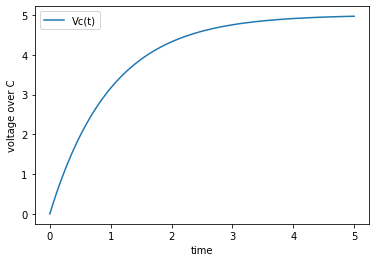

In [5]:
import matplotlib.pyplot as pl
import numpy as np

V0 = 5
twoC = 1.0
R = 1.0

def voft(t):
    return V0*(1-np.exp(-t/(twoC*R)))

t = np.linspace(0, 5, 100)
v = voft(t)

pl.plot(t, v, label="Vc(t)")
pl.xlabel("time"); pl.ylabel("voltage over C")
pl.legend(); pl.show()

1d) ![oned](pics/oned.png)

1e) ![onee](pics/onee.png)

1f) ![onef](pics/onef.png)

1g) ![oneg](pics/oneg.png)

1h) ![oneh](pics/oneh.png)

1i)

In [113]:
import numpy as np
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D

epsilon_0 = 8.854187e-12
# using epsilon_0 instead of constant for air, since theyre almost the same

d = 1e-3
h = d / 2
l = 4 * d
L = 3 * l
totQ = 1e-9

def EfromQ(q, Q, at):

    # q the value of each q
    # Q array of positions of all q's

    E = np.zeros_like(Q[0])

    for qPos in Q:
        R = at - qPos
        E += q * 1 / (4 * np.pi * epsilon_0) * R / np.linalg.norm(R) ** 3

    return E

In [114]:
# setting up the 4-plate system
# Qn: position of charges for the nth plate, counting from top

xN = 10
zN = 4 * xN

plateX = np.linspace(-l / 2, l / 2, xN) # x and z position of all plates
plateZ = np.linspace(-L / 2, L / 2, zN)

plateX, plateZ = np.meshgrid(plateX, plateZ)

pxi = plateX.flat
pzi = plateZ.flat

#                x         y          z
Q1 = np.array([[pxi[i], h / 2 + d, pzi[i]] for i in range(len(pxi))])

Q2 = np.copy(Q1)
Q2[:, 1] = h / 2

Q3 = np.copy(Q1)
Q3[:, 1] = -h / 2

Q4 = np.copy(Q1)
Q4[:, 1] = -(h / 2 + d)

qval = totQ / (2 * xN * zN)  # Q on each plate divided by area

In [115]:
# now where to calculate E
atN = 10
atY = np.linspace(
    h / 2 + 0.00001,
    h / 2 + d - 0.00001,
    atN  # between plate 1 and 2
)

atX = np.linspace(-l / 2, l / 2, atN)
atZ = np.linspace(-L / 2, L / 2, atN)

atX, atY, atZ = np.meshgrid(atX, atY, atZ)

atxf, atyf, atzf = atX.flat, atY.flat, atZ.flat

Ex = np.zeros((atN, atN, atN))
Ey = np.zeros((atN, atN, atN))
Ez = np.zeros((atN, atN, atN))


# loop through all the Qs and positions and calculate E

for i in range(len(atxf)):
    eCalc = np.zeros(3)
    for iq in [Q1, Q4]:  # positive
        eCalc += EfromQ(qval, iq, np.array([atxf[i], atyf[i], atzf[i]]))
    for iq in [Q2, Q3]:  # negative
        eCalc += EfromQ(-qval, iq, np.array([atxf[i], atyf[i], atzf[i]]))

    Ex.flat[i], Ey.flat[i], Ez.flat[i] = eCalc

#fig = pl.figure()
#ax = fig.gca(projection="3d")

#ax.quiver(atX, atY, atZ, Ex, Ey, Ez, length=0.00007, normalize=True)
#pl.show()

1j)

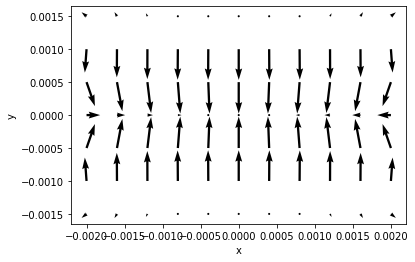

In [116]:

x = np.linspace(-l / 2, l / 2, 11)
y = np.linspace(-h - d, h + d, 7)

x, y = np.meshgrid(x, y)

Ex = np.zeros_like(x)
Ey = np.zeros_like(y)

for i in range(len(x.flat)):
    eCalc = np.zeros(3)
    for iq in [Q1, Q4]:  # positive
        eCalc += EfromQ(qval, iq, np.array([x.flat[i], y.flat[i], 0]))
    for iq in [Q2, Q3]:  # negative
        eCalc += EfromQ(-qval, iq, np.array([x.flat[i], y.flat[i], 0]))

    Ex.flat[i], Ey.flat[i], Ez = eCalc

# plot
pl.figure(figsize=(6, 4))
pl.quiver(x, y, Ex, Ey)
pl.xlabel("x"); pl.ylabel("y")
pl.show()

# the center of the plot (y=0) is center of the middle plate

In [117]:
# comparing with hand calculations


E = np.zeros((5, 3))
x = np.linspace(-l / 2, l / 2, 5) # and y = h/2 + d/2, a line parallel with the x-axis

for i in range(len(x)):
    eCalc = np.zeros(3)
    for iq in [Q1, Q4]:  # positive
        eCalc += EfromQ(qval, iq, np.array([x[i], h / 2 + d / 2, 0]))
    for iq in [Q2, Q3]:  # negative
        eCalc += EfromQ(-qval, iq, np.array([x[i], h / 2 + d / 2, 0]))

    E[i] = eCalc

for e in E:
    print(np.linalg.norm(e))

# the calculated value E = sigma/eps_0

calc = totQ / (
    2 * L * l * epsilon_0
)  # total Q is split between two sides, sigma = that Q/area


# middle value is at x = 0
print(f"calculated: {calc}\n middle value/calculated: {np.linalg.norm(E[2])/calc}")

683262.7921784747
952631.9148145056
986321.6970754338
952631.9148145056
683262.7921784747
calculated: 1176467.8865113948
 middle value/calculated: 0.8383753678140714


1k) 

1)We get a field inside the conductors that currently arent conducting. This would move the charges inside until there was no field.

2) The electric field lines arent perpendicular to the surfaces. This can barely be seen in the quiver plot in the corners of the image.

1l) ![onel](pics/onel.png)

m) Setting up the positions of all the objects

In [120]:
import numpy as np
import matplotlib.pyplot as pl

# [200, 200] is the middle
# d we define as 40
# h = 20
# l = 160

# the top of top plate is at h/2 + d + h = 70 above the middle = 270y
# bot of top = 250y
# left of top = 120x
# right of top = 280

# top mid = 210y
# bot mid = 190y

# top bot = 150y
# bot bot = 130y

v0 = 882

const = np.zeros((401, 401))
const[:, :] = float("nan")
# all the nuns are the points at which we calculate V by taking the average of surrounding values

# above the plates
const[271:, :] = 0

# below the plates
const[0:130, :] = 0

# top plate
const[250:271, 120:281] = v0

# mid plate
const[190:211, 120:281] = -v0

# bot plate
const[130:151, 120:281] = v0

In [121]:

# new values are calculated based on old ones
V = np.copy(const)

for i in range(len(V.flat)):
    if np.isnan(V.flat[i]):
        V.flat[i] = 0.0

Vold = np.copy(V)

for N in range(300):

    for x in range(401):
        for y in range(401):
            if np.isnan(const[x, y]):

                tot = 0
                totN = 0

                # checking to see if value exists before adding it to the sum and taking the average
                if x > 0:
                    tot += Vold[x - 1, y]
                    totN += 1
                if y > 0:
                    tot += Vold[x, y - 1]
                    totN += 1
                if y < 400:
                    tot += Vold[x, y + 1]
                    totN += 1
                if x < 400:
                    tot += Vold[x + 1, y]
                    totN += 1

                V[x, y] = tot / totN

    Vold = np.copy(V)

1n)

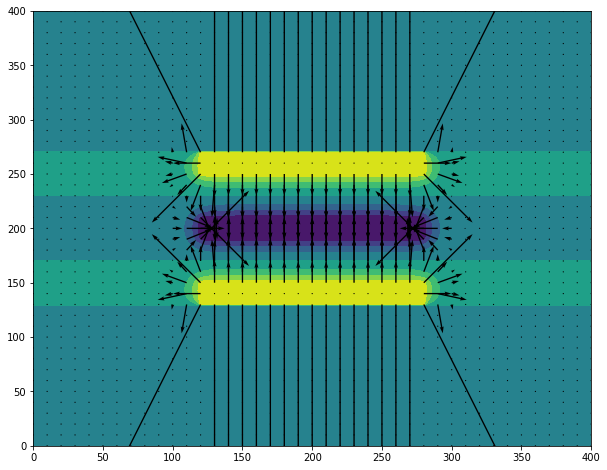

In [122]:

Ey, Ex = np.gradient(-V, 0.025e-3)


x = np.arange(401)
pl.figure(figsize=(10, 8))
pl.contourf(x, x, V)


pl.quiver(x[0::10], x[0::10], Ex[0::10, 0::10], Ey[0::10, 0::10], scale=30000000)
pl.show()

In [124]:
# to compare with earlier results

# mid line between top and mid: y=230

# lets just look at that one value in the middle

one = np.linalg.norm(E[2])
two = np.sqrt(Ex[230, 200]**2+Ey[230, 200]**2)

print (np.linalg.norm(E[2]), np.sqrt(Ex[230, 200]**2+Ey[230, 200]**2))
print (one/two)

986321.6970754338 1216070.3420682503
0.8110728984623801


It seems that this result is more in line with the calculated one than with Coulombs law version.

o) By using Gauss' law. All the field lines are perpendicular to the surfaces so its easy to calculate. Just set integral(EdS) = sigma/epsilon_0. Pick a rectangle as the S. The sigma calculated would be for the plate above and below. Then maybe use a scatter plot with differently colored dots to indicate higher density areas.

2a)

![twoar](pics/twoar.png)

![twoac](pics/twoac.png)

In [42]:
epsilon_0 = 8.854187e-12

eps = 10 * epsilon_0

l = 1e-3
h = 0.1e-3
conduct = 1.77e-4

C = 2 * eps * l * l / h
R = 56_497_175.5


print(C)
print(R * C)


1.7708374000000003e-12
0.00010004731136976371


And the task says that RC should be 1e-4 so that means its correct.

2b)

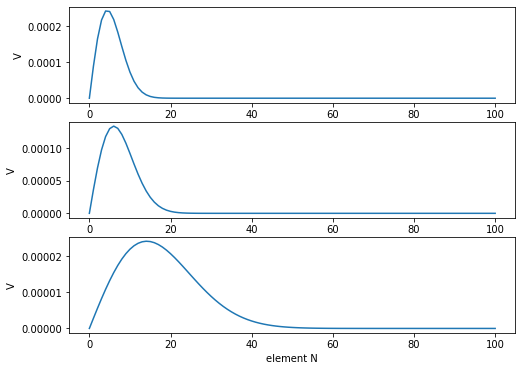

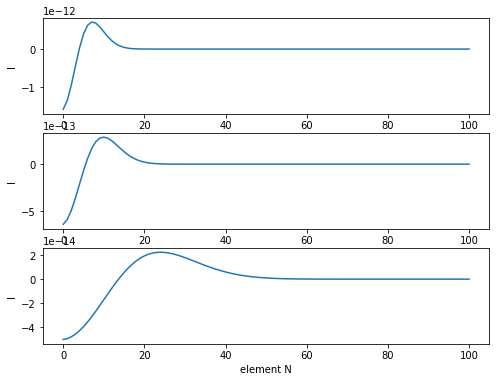

In [43]:
tau = R * C
V0 = 100e-3
N = 101 # first one is Vs



def Vs(t):
    return V0 * (t < tau)  # V0*1 for t<tau, V0*0 for t>tau


T = 1000 * tau
dt = tau / 10  # why not

nrLoops = int(T / dt)

V = np.zeros((N, nrLoops))  # first one is element index, second one is time
V[0, 0] = Vs(0)


for i in range(1, nrLoops):  # time=0 already set above

    for k in range(1, N - 1):  # last one is a special case since Vi+1 doesnt exist

        # equation for V(t+dt) = V(t) + dt*V'(t)

        # this one i derived
        V[k][i] = V[k][i - 1] + dt * (
            -2 * V[k][i - 1] + V[k - 1][i - 1] + V[k + 1][i - 1]
        ) / (R * C)

    # this one i got from eksempel:kabellikningen when i realised theyre basically the same
    V[-1][i] = V[-1][i - 1] + dt * (V[-2][i - 1] - V[-1][i - 1] / (R * C))


# current[i] = (V[i]-V[i-1])/R

I = np.zeros_like(V)

for i in range(len(I)-1):
    I[i] = (V[i]-V[i+1])/R    
    

# lets pick times T/100, T/55, T/10


pl.figure(figsize=(8, 6))

for i in range(3):
    pl.subplot(311 + i)
    pl.plot(range(N), V[:, int(nrLoops / (100-45*i))])
    pl.xlabel("element N"); pl.ylabel("V")

pl.show()

pl.figure(figsize=(8, 6))
for i in range(3):
    pl.subplot(311 + i)
    pl.plot(range(N), I[:, int(nrLoops / (100-45*i))])
    pl.xlabel("element N"); pl.ylabel("I")


pl.show()





2c) ![twoc](pics/twoc.png)

In [44]:
# setting up

from mpl_toolkits.mplot3d import Axes3D

I = 1e-12

# the line length 100*1mm

h = 1e-3
d = 0.1e-3

lineLen = 100 * 1e-3
mi0 = 12.57e-7
miPi = mi0 / (4 * np.pi)

N = 101
line = np.array([[(-lineLen / 2) + i * (lineLen / N), 0, 0] for i in range(N)])


In [45]:

# where to find B, a cylinder around the wire
points = []

for i in range(N):
    # x = (-lineLen/2) + i*(lineLen/N)
    # y,z make circles around the line

    dth = 2 * np.pi / 7
    x = (-lineLen / 2) + i * (lineLen / N)

    for r in [h + d, (h + d) * 3, (h + d) * 6]:  # radius of the circles

        for k in range(7):  # lets say 4 points in every circle

            points.append([x, r * np.sin(dth * k), r * np.cos(dth * k)])

            # every 21 elements we get a jump in x, easy to find whatever images in y,z plane we need

# loop through points and the wire and calculate B


points = np.array(points)
Bx = np.zeros(len(points))
By = np.zeros(len(points))
Bz = np.zeros(len(points))

for i in range(len(points)):
    dB = np.zeros(3)

    for k in range(len(line) - 1):
        
        # since im not using midpoint values, the position of segments will be just a little off
        
        dl = line[k + 1] - line[k]
        R = points[i] - line[k]
        dB += miPi * I * (np.cross(dl, R)) / np.linalg.norm(R)

    Bx[i], By[i], Bz[i] = dB



# lets plot an image at x=0
# and one 3d one
X = points[:, 0]
Y = points[:, 1]
Z = points[:, 2]

nY = Y[50 * 21 : (51 * 21)]  # around x=0
nZ = Z[50 * 21 : (51 * 21)]

nBy = By[50 * 21 : (51 * 21)]
nBz = Bz[50 * 21 : (51 * 21)]

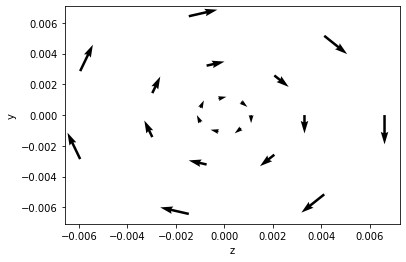

In [38]:
pl.quiver(nZ, nY, nBz, nBy)
pl.xlabel("z"); pl.ylabel("y")
pl.show()

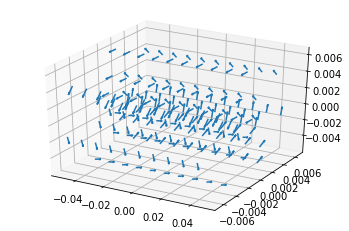

In [39]:
fig = pl.figure()
ax = fig.gca(projection="3d")


ax.quiver(X[0::10], Y[0::10], Z[0::10], Bx[0::10], By[0::10], Bz[0::10], length=0.001, normalize=True)
pl.show()

2d) ![twod](pics/twod.png)

In [40]:
ri = np.array([[-lineLen / 2 + (i - 0.5) * lineLen / 4, 0, 0] for i in [1, 2, 3, 4]])
dl = np.array([lineLen / 4, 0, 0])


iBx = np.zeros(len(points))
iBy = np.zeros(len(points))
iBz = np.zeros(len(points))

for i in range(len(points)):
    dB = np.zeros(3)

    for k in range(len(ri)):

        R = points[i] - ri[k]
        dB += miPi * I * (np.cross(dl, R)) / np.linalg.norm(R)

    iBx[i], iBy[i], iBz[i] = dB

# the plots look the same

# lets compare some values

print("Difference in norms") # as a unit, not their actual norms

for i in range(0, len(iBx), 100):
    B = np.array([Bx[i], By[i], Bz[i]]) # obviously tehre is no Bx
    Bnew = np.array([iBx[i], iBy[i], iBz[i]])
    print (np.linalg.norm(B-Bnew))

Difference in norms
2.524879385387493e-22
1.442757050633569e-22
3.3482802129772053e-22
8.68323119097944e-22
2.600898650739286e-22
3.3435441230215385e-22
4.75745994037289e-22
3.186182215942958e-23
1.7755249413153432e-21
2.2122071001798682e-22
4.391256325701119e-22
5.143207143660197e-22
2.455563163726655e-22
4.615090632608893e-22
3.8910488864934446e-22
3.4062090647341137e-22
3.9897346817410824e-22
1.7507087870785673e-22
3.933694215375896e-22
9.196529971854151e-22
2.1550678736102318e-22
1.3280186783369354e-22


2f)![twof](pics/twof.png)

If the current is constant well then there is no variation in flux.

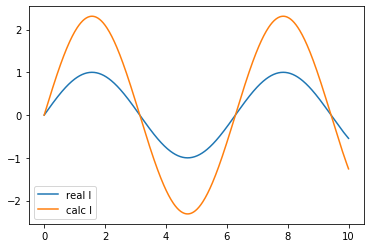

In [83]:
# this one would take took long, but heres proof of concept

def I(t):
    return np.sin(t)


t = np.linspace(0, 10, 500)
Ir = I(t)
Icalc = np.zeros_like(Ir)

# lets pick a point at r=1m away from the wire
# say, y = 1

Bat = np.array([0, 1, 0])
mi0 = 12.57e-7

r=1
a=0.00001
S = np.pi*a**2
dt = t[1]-t[0]

aBz = np.zeros_like(Ir) # z is the only component

line = np.array([[-5+i, 0, 0] for i in range(11)])

for i in range(len(t)):
    
    dB = np.zeros(3)

    for k in range(len(line) - 1):

        dl = line[k + 1] - line[k]
        R = Bat - line[k]
        dB += miPi * Ir[i] * (np.cross(dl, R)) / np.linalg.norm(R)

    xx, yy, aBz[i] = dB # the rest dont matter, at y=0 only Bz exists
    
    Icalc[i] = 2*r/(mi0*a**2)*aBz[i]*S
    
pl.plot(t, Ir, label="real I")
pl.plot(t, Icalc, label="calc I")
pl.legend()
pl.show()



Well... I guess that will have to do